
## Support Vector Regression 
### Data Analysis on Bitcoin Historical Data

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab as plt

import time
import datetime

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

'''
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
'''

'\nfrom sklearn.model_selection import KFold\nfrom sklearn.metrics import confusion_matrix, accuracy_score\n'

In [2]:
##### read data #####
bitcoin=pd.read_csv("/Users/jinshuning/Documents/Semester6/CS5751/Project/data/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv")

In [3]:
print (bitcoin.head())
print (bitcoin.shape)

    Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980  4.39  4.39  4.39   4.39      0.455581                2.0   
2  1325318040  4.39  4.39  4.39   4.39      0.455581                2.0   
3  1325318100  4.39  4.39  4.39   4.39      0.455581                2.0   
4  1325318160  4.39  4.39  4.39   4.39      0.455581                2.0   

   Weighted_Price  
0            4.39  
1            4.39  
2            4.39  
3            4.39  
4            4.39  
(3161057, 8)


In [4]:
##### 1 Preprocessing #####

In [5]:
# unix timestamp to normal time
timestamp = [datetime.datetime.fromtimestamp(int(t)).strftime('%Y-%m-%d %H:%M:%S') for t in bitcoin['Timestamp']]

In [6]:
bitcoin['Timestamp'] =  timestamp

In [7]:
timestamp[:10]

['2011-12-31 01:52:00',
 '2011-12-31 01:53:00',
 '2011-12-31 01:54:00',
 '2011-12-31 01:55:00',
 '2011-12-31 01:56:00',
 '2011-12-31 01:57:00',
 '2011-12-31 01:58:00',
 '2011-12-31 01:59:00',
 '2011-12-31 02:00:00',
 '2011-12-31 02:01:00']

In [8]:
'''
start =  timestamp.index('2017-01-01 00:00:00')
end = timestamp.index('2018-01-01 00:00:00') 
print (start,end)
'''

"\nstart =  timestamp.index('2017-01-01 00:00:00')\nend = timestamp.index('2018-01-01 00:00:00') \nprint (start,end)\n"

In [9]:
# daily data
# from 2017-01-01 00:00:00 to 2018-01-01 00:00:00
timestamp_subset = [timestamp.index(t) for t in timestamp 
     if '00:00:00' in t and '2017-01-01 00:00:00'<=t<='2018-01-01 00:00:00']

In [10]:
subset =  bitcoin.iloc[timestamp_subset,]

In [11]:
subset

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2625736,2017-01-01 00:00:00,963.74,963.74,963.74,963.74,0.050000,48.187000,963.740000
2627176,2017-01-02 00:00:00,1004.99,1004.99,1003.20,1003.20,0.240000,241.084929,1004.520539
2628616,2017-01-03 00:00:00,1020.06,1020.06,1020.06,1020.06,0.149640,152.641778,1020.060000
2630056,2017-01-04 00:00:00,1047.79,1047.79,1047.79,1047.79,0.279949,293.327323,1047.790000
2631496,2017-01-05 00:00:00,1120.19,1120.19,1120.12,1120.12,0.546098,611.724993,1120.173977
2632936,2017-01-06 00:00:00,980.06,980.06,980.03,980.06,4.517370,4427.254460,980.051302
2634376,2017-01-07 00:00:00,827.62,827.71,827.62,827.71,1.727000,1429.423670,827.691760
2635816,2017-01-08 00:00:00,931.47,931.54,930.11,930.11,2.139657,1992.860762,931.392796
2637256,2017-01-09 00:00:00,894.38,894.41,894.38,894.41,45.891034,41045.210235,894.405865
2638696,2017-01-10 00:00:00,894.23,894.23,894.23,894.23,13.000000,11624.990000,894.230000


In [12]:
x = subset['Close']

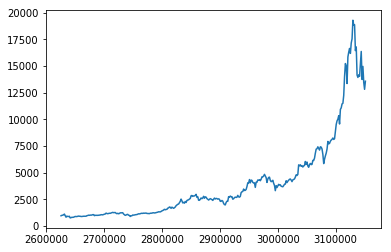

In [13]:
plt.plot(x)
plt.show()

In [14]:
# log transform to stablize variance
x_log =np.log(x)

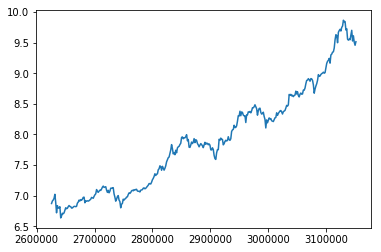

In [15]:
plt.plot(x_log)
plt.show()

In [16]:
x_log = list(x_log)

In [17]:
##### 2 processing #####

In [18]:
#p: autoregression order for x (sliding window size)
def lag (x,p):
    t = len(x_log)
    n = t-p
    df = n 
    Y = x_log[p:t]
    #k = p+1
    X = np.matrix([float(0) for _ in range(n*p)]).reshape(n,p)
    for i in range(n):
        for j in range(p):
            X[i,j]=x_log[i+j]
    return X,Y

In [19]:
X,y = lag(x=x_log,p=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)

print (len(X),len(y))
print (len(X_train),len(y_train))
print (len(X_test),len(y_test) )

clf = SVR(C=100, epsilon=0.01,gamma = 0.02, kernel = 'rbf')
#clf = SVR()
clf.fit(X_train, y_train)

365 365
328 328
37 37


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.02,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
### 3 recursive forecast: m step ahead ###

In [21]:
## 3.0 just for practice, ignore this ##

In [22]:
past  = X_train[-1,].tolist()
past

[[9.00114163816762]]

In [23]:
y1=clf.predict(past)
y1

array([9.00042207])

In [24]:
past1 = past[0][1:]
past1.append(y1[0])
past1 
past1=[past1]
past1

[[9.000422065029717]]

In [25]:
past1
y2=clf.predict(past1)
y2

array([8.99973583])

In [26]:
## 3.1 define a function ##

In [27]:
# m: m-step ahead forecast for y
# using recursive one-step-ahead strategy ??

def m_Forecast (m,last):
    y_pred_list = []
    past = last
    for i in range(m):
        y_pred = clf.predict(past)
        y_pred_list.append(y_pred[0])
        past = past[0][1:]
        past.append(y_pred[0]) 
        past=[past]
    return y_pred_list

In [28]:
# metric: MAPE
def mape (y_test, y_pred):
    m = len(y_test)
    error = [np.abs(1-y_pred[i]/y_test[i]) for i in range(m)]
    mape = 100/m * sum (error)
    return mape

In [29]:
# 3.2 Forecast on Data

In [30]:
# only use the last few points in training set
last  = X_train[-1,].tolist(); print (last)

m = len(y_test)
y_pred_m = m_Forecast(m,last)

#check: first 2 consistent with practice result y1, y2
print ('\n',y_pred_m)
print ('\n',y_test)

[[9.00114163816762]]

 [9.000422065029717, 8.999735829147347, 8.999081338530296, 8.9984570814646, 8.997861622080158, 8.997293596204536, 8.996751707474438, 8.996234723678349, 8.995741473327804, 8.995270842429086, 8.994821771452642, 8.994393252475838, 8.993984326493937, 8.993594080888407, 8.993221647037679, 8.992866198063318, 8.992526946706342, 8.992203143319777, 8.991894073971544, 8.991599058652092, 8.991317449583029, 8.99104862961449, 8.990792010707445, 8.990547032498789, 8.99031316094382, 8.990089887028695, 8.989876725548747, 8.989673213954553, 8.989478911254302, 8.989293396973757, 8.989116270171841, 8.988947148497921, 8.988785667310559, 8.988631478828971, 8.988484251331577, 8.988343668393377, 8.988209428166222]

 [9.090113226916309, 9.161675199994901, 9.195774807296868, 9.211635532893073, 9.24342885987174, 9.165344052070004, 9.299065280032552, 9.312347170205223, 9.344861649502946, 9.350078835814854, 9.412755363450954, 9.548236594248413, 9.630531846247743, 9.614634795100008, 9.4993495

In [31]:
# m-Step-Ahead
# Test Error
# MSE
test_mse = mean_squared_error(y_test, y_pred_m)
print (test_mse)
# MAE
test_mae = mean_absolute_error(y_test, y_pred_m)
print (test_mae)
# MAPE
test_mape = mape(y_test, y_pred_m)
print (test_mape)

0.3308235636316535
0.5349924104250615
5.5688248770212665


In [32]:
# Training Error
y_pred_train= clf.predict(X_train)
# MSE
train_mse = mean_squared_error(y_train, y_pred_train)
print (train_mse)

0.0021859085460671033


In [33]:
# 1-Step-Ahead
# Testing Error
y_pred_test= clf.predict(X_test)
# MSE
test_mse_1 = mean_squared_error(y_test, y_pred_test)
print (test_mse_1)
test_mape_1 = mape(y_test, y_pred_test)
print (test_mape_1)

0.008644826207665431
0.8527325124690575


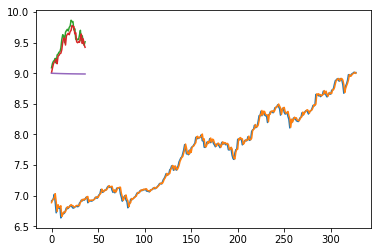

In [34]:
plt.plot (y_train)
plt.plot (y_pred_train)
plt.plot (y_test)
plt.plot (y_pred_test)
plt.plot (y_pred_m)
plt.show()

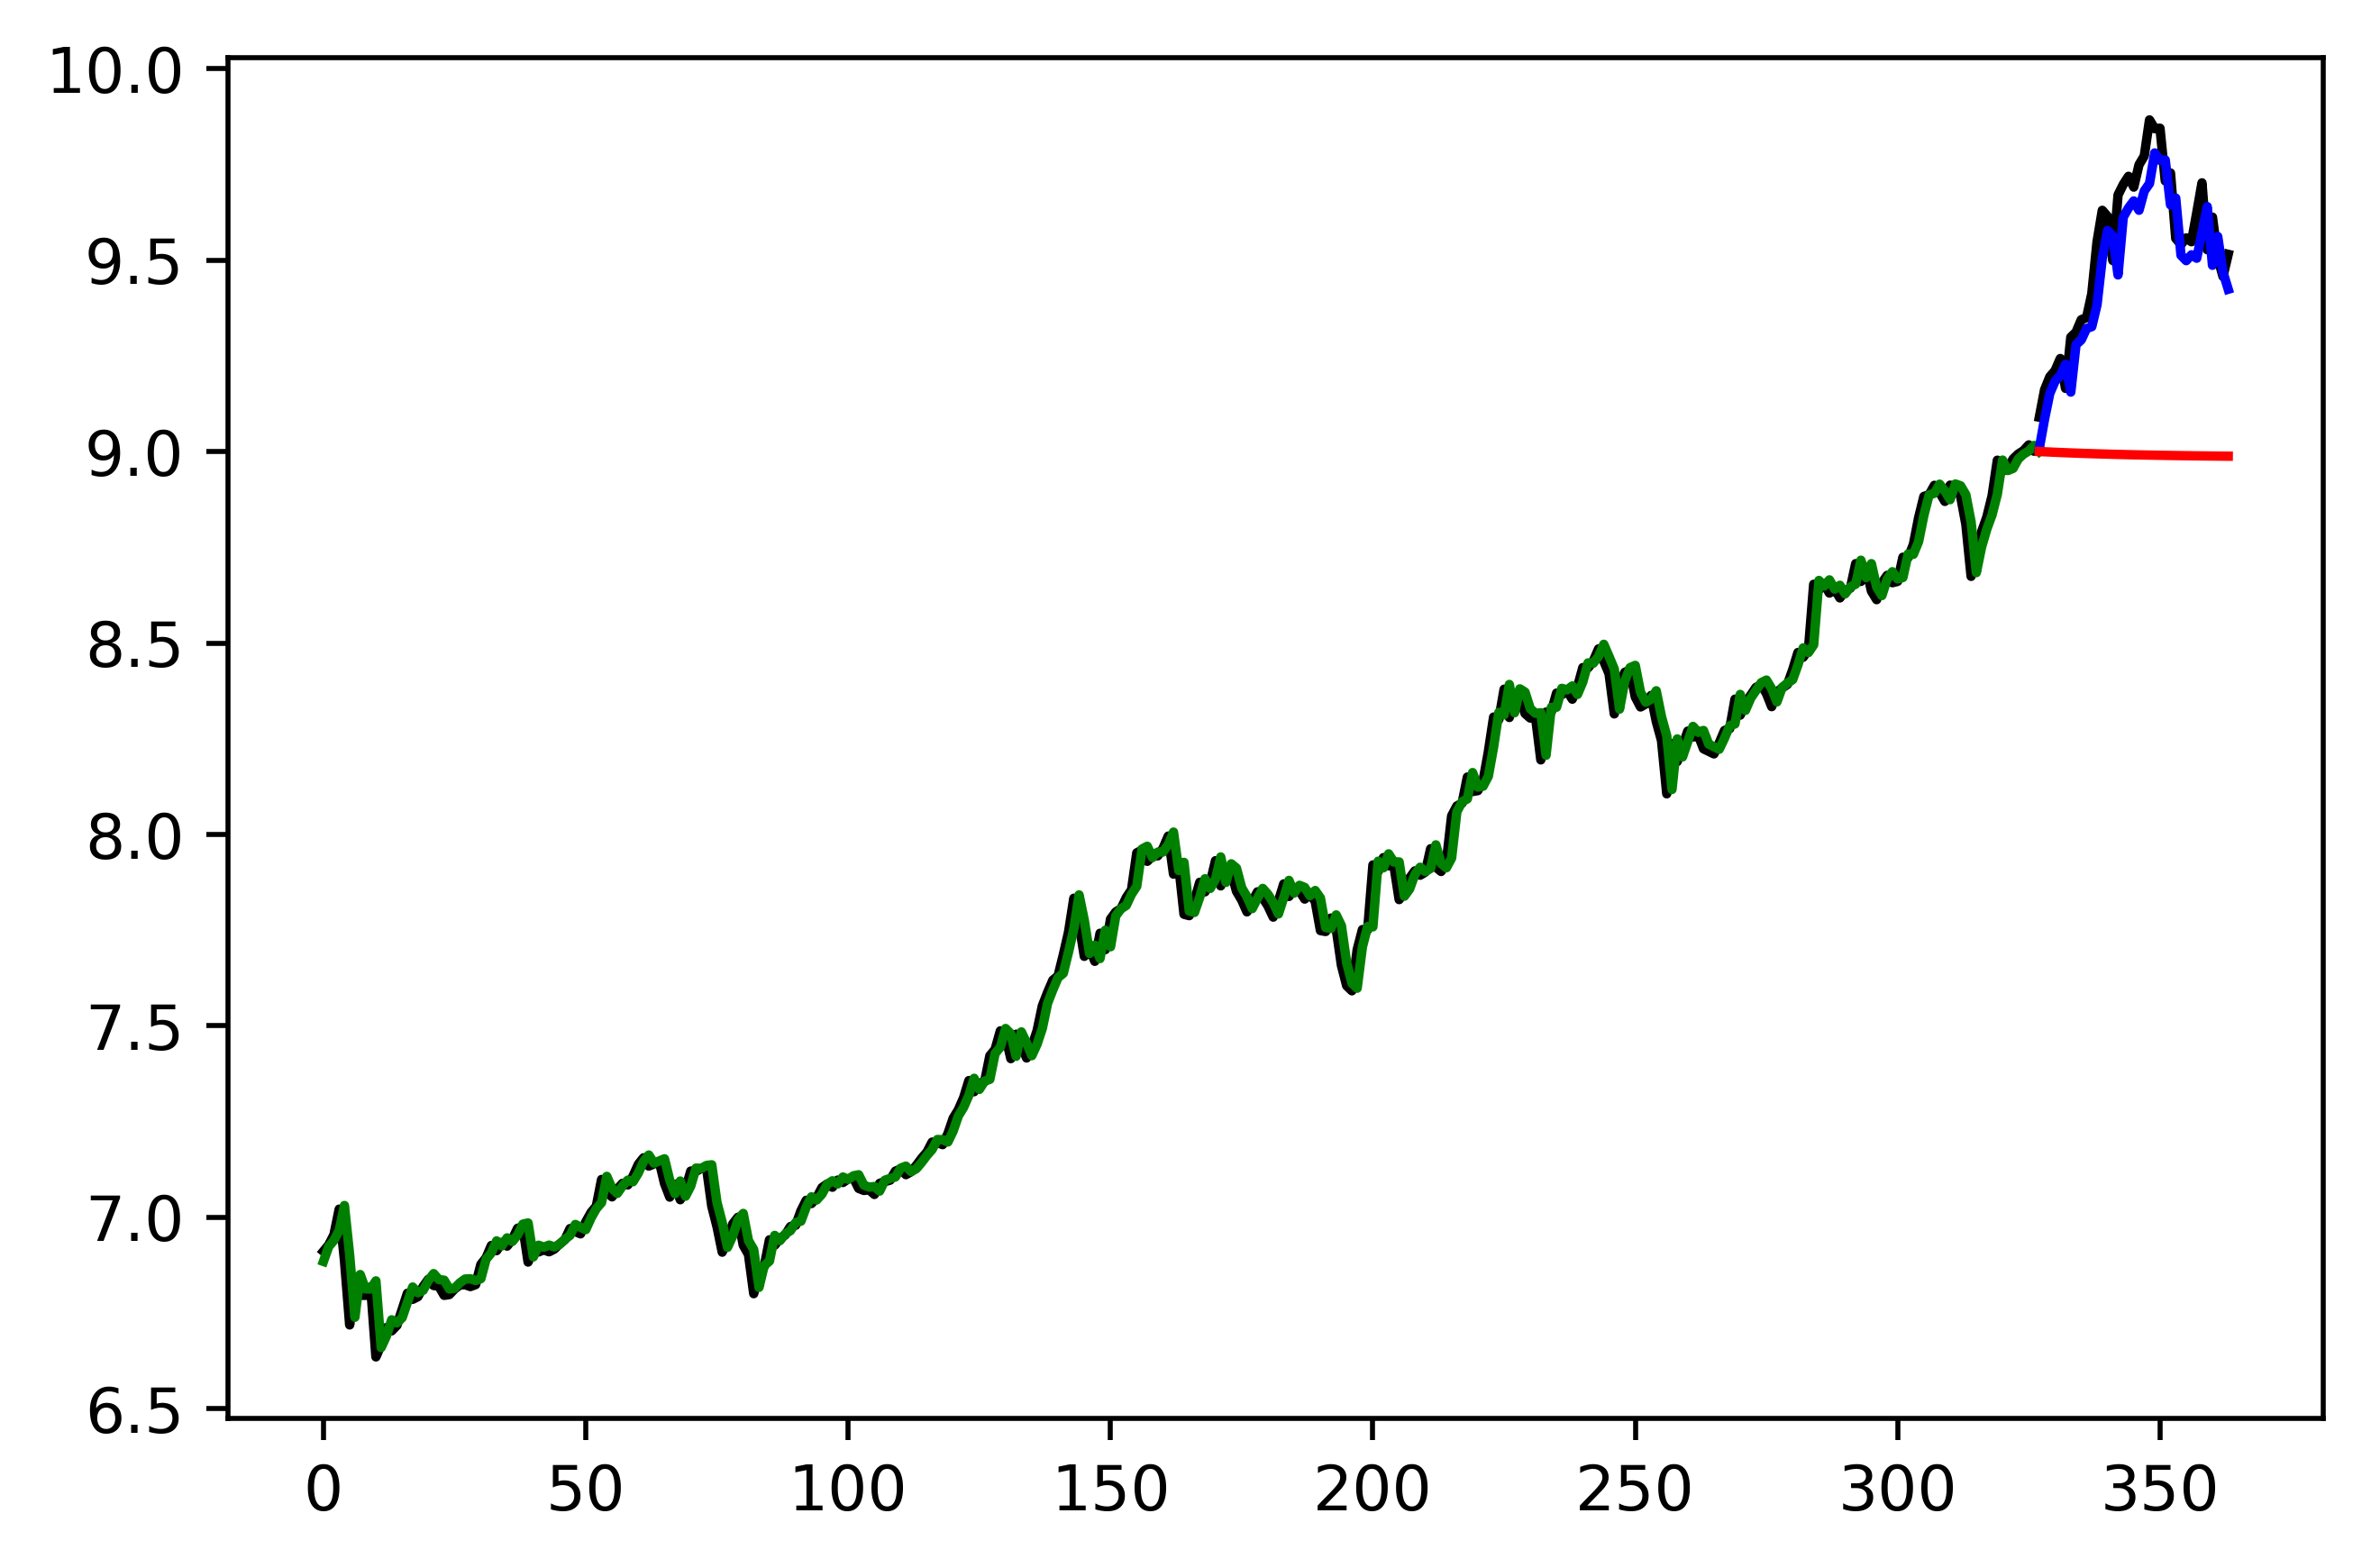

In [35]:
# Create some test data
secret_data_X1 = np.linspace(0,327,328)
secret_data_Y1 = y_pred_train
secret_data_X2 = np.linspace(327,327+37-1,37)
secret_data_Y2 = y_pred_test

secret_data_Y10 = y_train
secret_data_Y20 = y_test
secret_data_Y22 = y_pred_m

# Show the secret data
#plt.subplot(2,1,1)
plt.figure(dpi=500)
plt.plot(secret_data_X1,secret_data_Y10,'black')
plt.plot(secret_data_X2,secret_data_Y20,'black')
plt.plot(secret_data_X1,secret_data_Y1,'g')
plt.plot(secret_data_X2,secret_data_Y2,'b')
plt.plot(secret_data_X2,secret_data_Y22,'r')

plt.show()

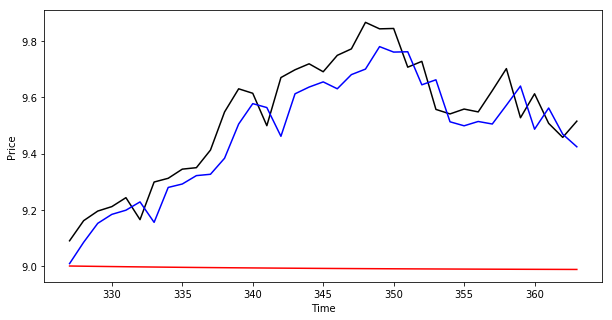

In [36]:
# Create some test data

secret_data_Y1 = y_pred_train
secret_data_X2 = np.linspace(327,327+37-1,37)

secret_data_Y20 = y_test
secret_data_Y22 = y_pred_m

# Show the secret data
#plt.figure(dpi=1000,figsize=(10, 6))#

plt.rcParams["figure.figsize"] = [10,5]
plt.plot(secret_data_X2,secret_data_Y20,'black')
plt.plot(secret_data_X2,secret_data_Y2,'b')
plt.plot(secret_data_X2,secret_data_Y22,'r')

plt.ylabel('Price')
plt.xlabel('Time')

plt.savefig('svm_fore.eps', format='eps', dpi=1000) 
plt.show()
